<a href="https://colab.research.google.com/github/NtimTim/DS_School_Home_Work/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BA_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8E_5-empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Практика**

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline


**ЦПТ для различных распределений**

Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле scipy.stats.

**Сгенерируйте примеры из распределения**

In [2]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
#cosine_rv = sts.wald()
#cosine_rv = sts.uniform()
#cosine_rv = sts.semicircular()
#cosine_rv = sts.rayleigh()
#cosine_rv = sts.moyal()
#cosine_rv = sts.maxwell()  # 0-4
#cosine_rv = sts.hypsecant()
#cosine_rv = sts.logistic()
#cosine_rv = sts.laplace()
cosine_rv = sts.expon() #отличается
#cosine_rv = sts.anglit()
#cosine_rv = sts.arcsine() #необычно
#cosine_rv = sts.norm()
#cosine_rv = sts.cosine()
sample = cosine_rv.rvs(100)
sample

array([1.10984450e+00, 1.19457685e-02, 2.48913474e-02, 2.67032706e-01,
       9.25592278e-01, 1.34472784e+00, 9.17558850e-01, 2.98074949e+00,
       5.28317814e-01, 1.03774524e-01, 7.26015727e-01, 2.06518070e+00,
       1.45942529e+00, 2.19144064e-02, 1.46989229e-01, 5.16121665e-01,
       4.45435407e+00, 5.70196170e-02, 6.94412765e-01, 1.14324251e+00,
       5.69917434e+00, 1.39215623e+00, 1.21297542e+00, 2.96802145e+00,
       1.85229675e+00, 1.37708608e+00, 6.91231283e-01, 1.30600042e+00,
       3.45417326e-03, 1.24855761e-01, 3.52654023e-01, 2.50073618e-01,
       1.23914915e+00, 2.26385999e+00, 2.27223871e+00, 3.01888362e+00,
       4.93163214e-01, 6.86121054e-02, 6.96279571e-01, 2.05610572e-01,
       1.33471174e+00, 2.47538499e-01, 5.08984132e-01, 3.76574770e-01,
       1.55716828e+00, 3.26867632e-01, 5.92824809e-01, 1.57329710e+00,
       1.81922778e+00, 4.87135677e-01, 5.46666784e-02, 2.71374585e+00,
       1.22844301e-01, 4.16935123e-01, 9.79204628e-01, 1.58929048e+00,
      

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = cosine_rv.mean() # настоящее среднее случайной величины

In [5]:
real_mean

1.0

In [6]:
real_var = cosine_rv.var() # настоящая дисперсия случайной величины

In [7]:
real_var

1.0

**Постройте гистограмму выборки и теоретическую плотность распределения**

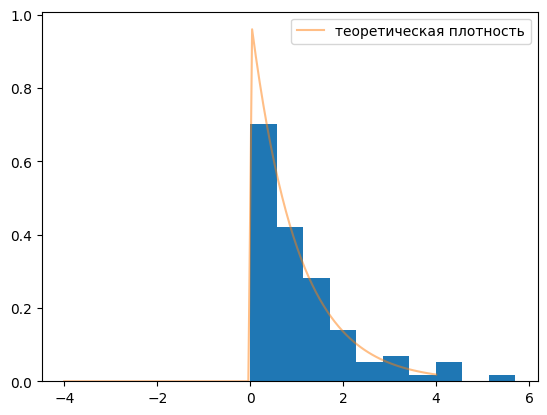

In [8]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [9]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.1093476231668733
1.238800005970448


**Оценим распределение выборочного среднего для разных объёмов выборок**

Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

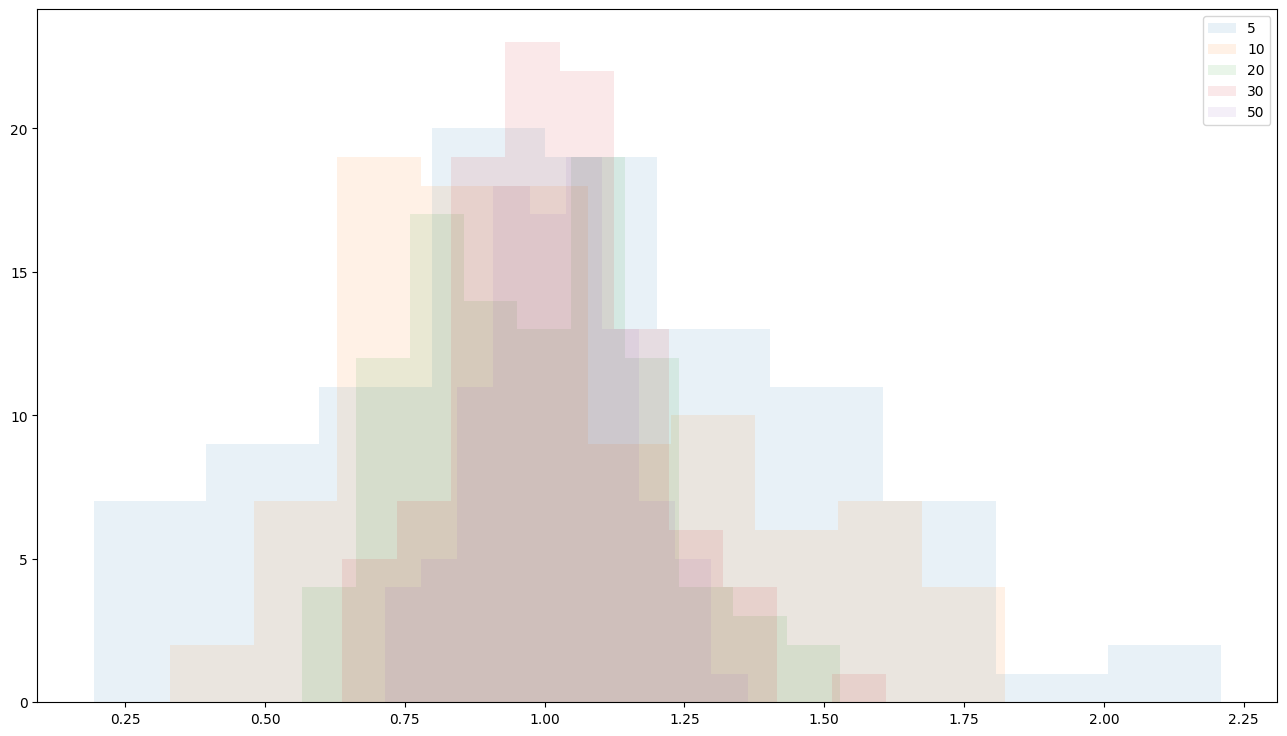

In [10]:
# ваш код тут
plt.figure(figsize=(16,9))
for N in [5, 10, 20, 30, 50]:
    means = []
    for i in range(100):
         means.append(np.mean(cosine_rv.rvs(N)))
    plt.hist(means, alpha=0.1)
plt.legend(['5', '10', '20', '30', '50'])
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


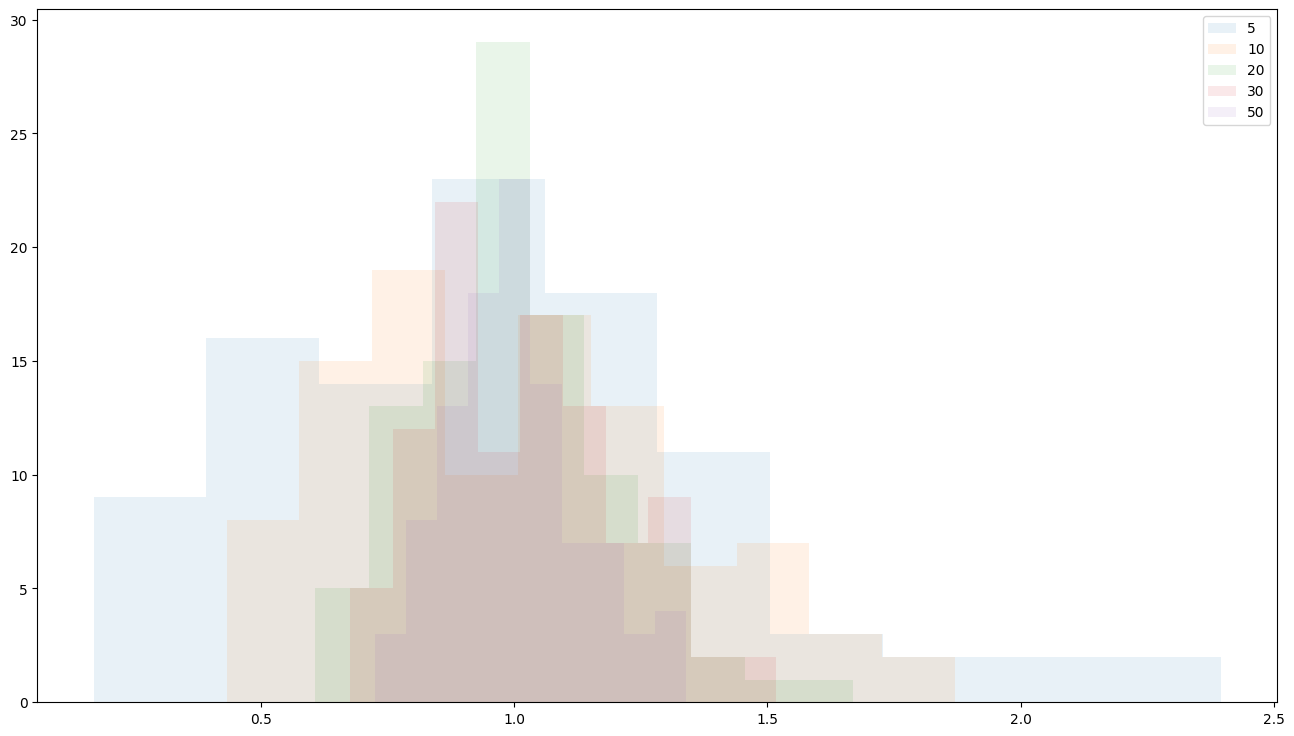

In [11]:
plt.figure(figsize=(16,9))
# сгенерируем выборочные средние
for N in [5, 10, 20, 30, 50]:
    means = []
    for i in range(100):
         means.append(np.mean(cosine_rv.rvs(N)))
    plt.hist(means, alpha=0.1)
    for M in means:
        norm_rv = sts.norm(loc=M.mean(), scale=M.std() / np.sqrt(N))
        x = np.linspace(1,200, 100)
        pdf = norm_rv.pdf(x)
plt.legend(['5', '10', '20', '30', '50'])
plt.show()

Как вы считаете, для выбранного распределения аппроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [12]:
# Для почти всех выглядит похоже средне/нормально (=скучно?), не отличается от обычного нормального, даже несмотря на экспоненту

**Доверительный интервал на основе ЦПТ**

Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [16]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

In [88]:
data = df.query('churn == False')['total day calls']

print("Доверительный интервал при условии charn = False для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(confidence=0.95, loc=np.mean(data),
                      scale= np.std(data, ddof=1)/ np.sqrt(len(data)))
))

Доверительный интервал при условии charn = False для среднего по цпт интервальная оценка: (99.55618833318324, 101.01012745629045) 


In [89]:
import statsmodels.stats.weightstats as ssw

print("Доверительный интервал при условии charn = False для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data), std_mean=np.std(data, ddof=1)/np.sqrt(len(data)), alpha=0.05, alternative='2s')
))

Доверительный интервал при условии charn = False для среднего по цпт методом _zconfint_generic: (99.55618833318324, 101.01012745629045) 


In [90]:
data = df.query('churn == True')['total day calls']

print("Доверительный интервал при условии charn = True для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(confidence=0.95, loc=np.mean(data),
                      scale= np.std(data, ddof=1)/ np.sqrt(len(data)))
))

print("Доверительный интервал при условии charn = True для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data), std_mean=np.std(data, ddof=1)/np.sqrt(len(data)), alpha=0.05, alternative='2s')
))

Доверительный интервал при условии charn = True для среднего по цпт интервальная оценка: (99.41066229112079, 103.26014516229537) 
Доверительный интервал при условии charn = True для среднего по цпт методом _zconfint_generic: (99.41066229112079, 103.26014516229537) 


Значения, полученные по интервальной оценке и методом _zconfint_generic совпали